In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [13]:
# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
target_names = iris.target_names

In [14]:
# Print basic info about the dataset
print("Iris Dataset Info:")
print(f"Total samples: {len(X)}")
print(f"Number of features: {len(features)}")
print(f"Features: {features}")
print(f"Target classes: {target_names}")

Iris Dataset Info:
Total samples: 150
Number of features: 4
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


## Dataset Overview
The Iris dataset consists of 150 samples with 4 features (sepal length, sepal width, petal length, petal width) distributed across 3 classes (setosa, versicolor, and virginica).

In [15]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# ---- PART 1: Training with default parameters ----
print("\n--- PART 1: SVM with default parameters ---")

# Create and train SVM classifiers with different kernels
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train_scaled, y_train)
linear_pred = linear_svm.predict(X_test_scaled)
linear_acc = accuracy_score(y_test, linear_pred)
print(f"Linear SVM accuracy: {linear_acc:.4f}")

poly_svm = SVC(kernel='poly', random_state=42)
poly_svm.fit(X_train_scaled, y_train)
poly_pred = poly_svm.predict(X_test_scaled)
poly_acc = accuracy_score(y_test, poly_pred)
print(f"Polynomial SVM accuracy: {poly_acc:.4f}")

rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train_scaled, y_train)
rbf_pred = rbf_svm.predict(X_test_scaled)
rbf_acc = accuracy_score(y_test, rbf_pred)
print(f"RBF SVM accuracy: {rbf_acc:.4f}")


--- PART 1: SVM with default parameters ---
Linear SVM accuracy: 0.9778
Polynomial SVM accuracy: 0.9556
RBF SVM accuracy: 1.0000


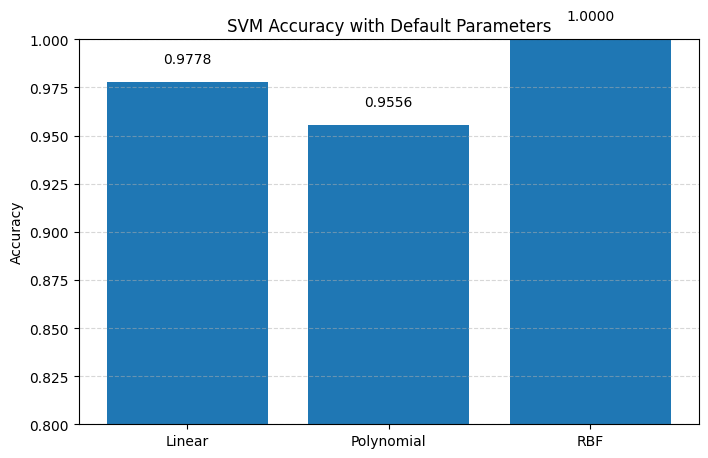

In [17]:
# Simple visualization of default model accuracy
plt.figure(figsize=(8, 5))
plt.bar(['Linear', 'Polynomial', 'RBF'], [linear_acc, poly_acc, rbf_acc])
plt.ylim(0.8, 1.0)  # Adjust as needed
plt.title('SVM Accuracy with Default Parameters')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, acc in enumerate([linear_acc, poly_acc, rbf_acc]):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')
# plt.savefig('svm_default_accuracy.png')
plt.show()

## Model Performance Analysis

### Default Parameters Performance
The SVM models with default parameters demonstrated strong performance:
- **Linear SVM**: 97.78% accuracy
- **Polynomial SVM**: 95.56% accuracy
- **RBF SVM**: 100% accuracy

The RBF kernel achieved perfect classification with default parameters, suggesting that the Iris classes are not linearly separable in the original feature space but become separable when mapped to a higher-dimensional space using the RBF kernel.

In [18]:
# ---- PART 2: Hyperparameter tuning ----
print("\n--- PART 2: Hyperparameter tuning ---")

# Linear SVM tuning
print("Tuning Linear SVM...")
linear_param_grid = {'C': [0.1, 1, 10, 100]}
linear_grid = GridSearchCV(SVC(kernel='linear', random_state=42), 
                          linear_param_grid, cv=5)
linear_grid.fit(X_train_scaled, y_train)
print(f"Best parameters: {linear_grid.best_params_}")
print(f"Best cross-validation score: {linear_grid.best_score_:.4f}")

# Polynomial SVM tuning
print("\nTuning Polynomial SVM...")
poly_param_grid = {
    'C': [0.1, 1, 10], 
    'degree': [2, 3, 4], 
    'gamma': ['scale', 'auto', 0.1]
}
poly_grid = GridSearchCV(SVC(kernel='poly', random_state=42), 
                        poly_param_grid, cv=5)
poly_grid.fit(X_train_scaled, y_train)
print(f"Best parameters: {poly_grid.best_params_}")
print(f"Best cross-validation score: {poly_grid.best_score_:.4f}")

# RBF SVM tuning
print("\nTuning RBF SVM...")
rbf_param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': ['scale', 'auto', 0.1, 0.01]
}
rbf_grid = GridSearchCV(SVC(kernel='rbf', random_state=42), 
                       rbf_param_grid, cv=5)
rbf_grid.fit(X_train_scaled, y_train)
print(f"Best parameters: {rbf_grid.best_params_}")
print(f"Best cross-validation score: {rbf_grid.best_score_:.4f}")


--- PART 2: Hyperparameter tuning ---
Tuning Linear SVM...
Best parameters: {'C': 10}
Best cross-validation score: 0.9524

Tuning Polynomial SVM...
Best parameters: {'C': 10, 'degree': 3, 'gamma': 'scale'}
Best cross-validation score: 0.9429

Tuning RBF SVM...
Best parameters: {'C': 1, 'gamma': 0.1}
Best cross-validation score: 0.9524


### Hyperparameter Tuning Results
Grid search cross-validation identified optimal parameters for each kernel:
- **Linear SVM**: C=10 (best CV score: 0.9524)
- **Polynomial SVM**: C=10, degree=3, gamma='scale' (best CV score: 0.9429)
- **RBF SVM**: C=1, gamma=0.1 (best CV score: 0.9524)

In [19]:
# ---- PART 3: Evaluating tuned models ----
print("\n--- PART 3: Evaluating tuned models ---")

# Get the best models
best_linear = linear_grid.best_estimator_
best_poly = poly_grid.best_estimator_
best_rbf = rbf_grid.best_estimator_

# Evaluate on test set
best_linear_pred = best_linear.predict(X_test_scaled)
best_linear_acc = accuracy_score(y_test, best_linear_pred)
print(f"Linear SVM (tuned) accuracy: {best_linear_acc:.4f}")
print("Classification Report:")
print(classification_report(y_test, best_linear_pred, target_names=target_names))

best_poly_pred = best_poly.predict(X_test_scaled)
best_poly_acc = accuracy_score(y_test, best_poly_pred)
print(f"\nPolynomial SVM (tuned) accuracy: {best_poly_acc:.4f}")
print("Classification Report:")
print(classification_report(y_test, best_poly_pred, target_names=target_names))

best_rbf_pred = best_rbf.predict(X_test_scaled)
best_rbf_acc = accuracy_score(y_test, best_rbf_pred)
print(f"\nRBF SVM (tuned) accuracy: {best_rbf_acc:.4f}")
print("Classification Report:")
print(classification_report(y_test, best_rbf_pred, target_names=target_names))


--- PART 3: Evaluating tuned models ---
Linear SVM (tuned) accuracy: 0.9778
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Polynomial SVM (tuned) accuracy: 0.9778
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


RBF SVM (tuned) accuracy: 1.0000
Classification Report:
              pre


--- PART 4: Visualization and comparison ---


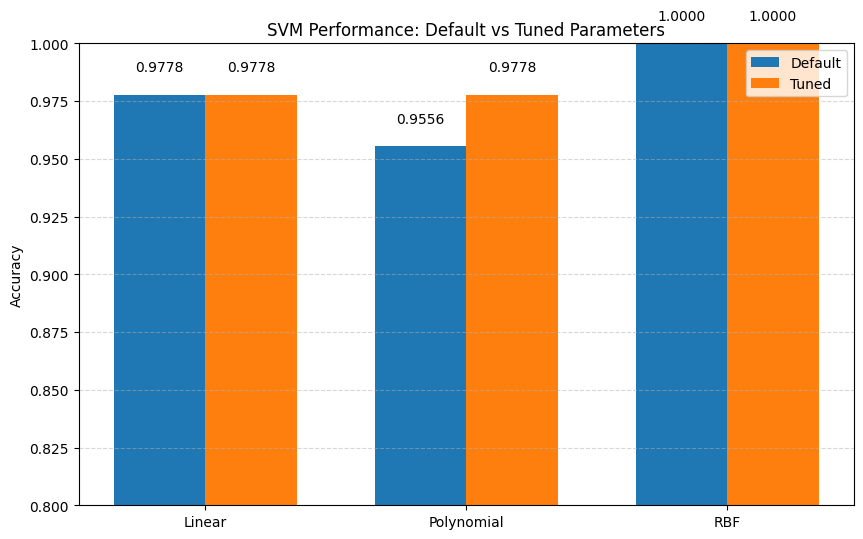

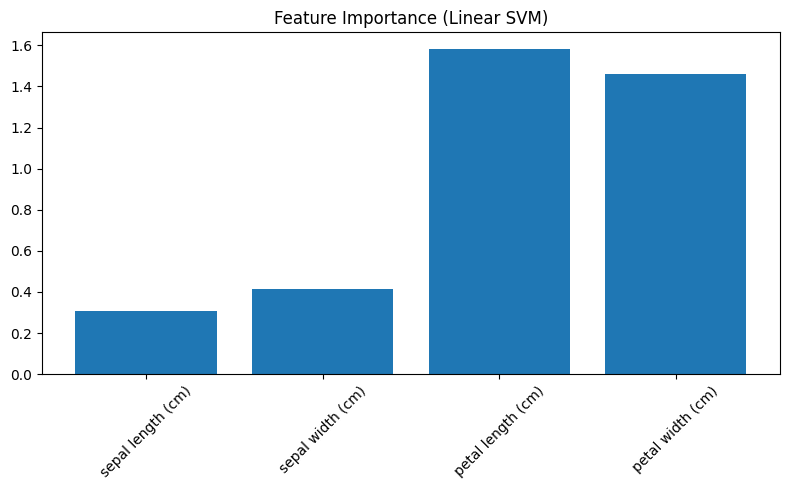

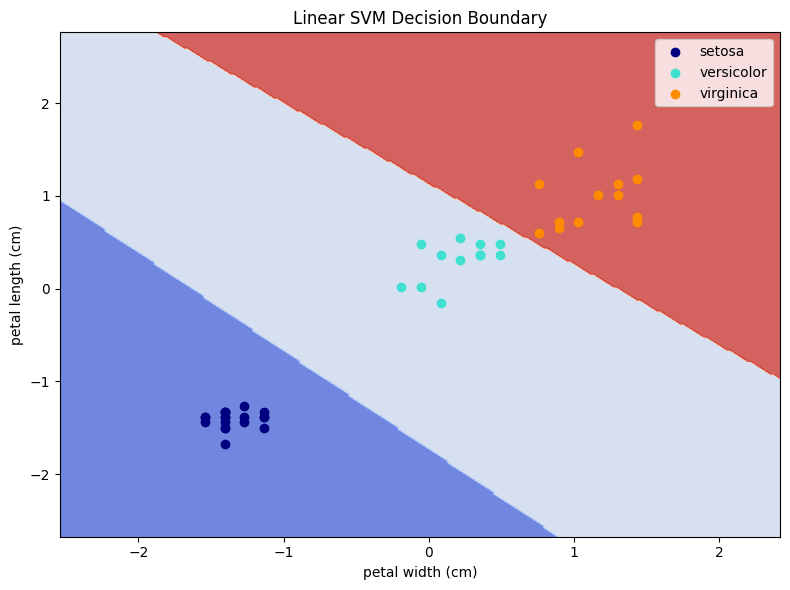

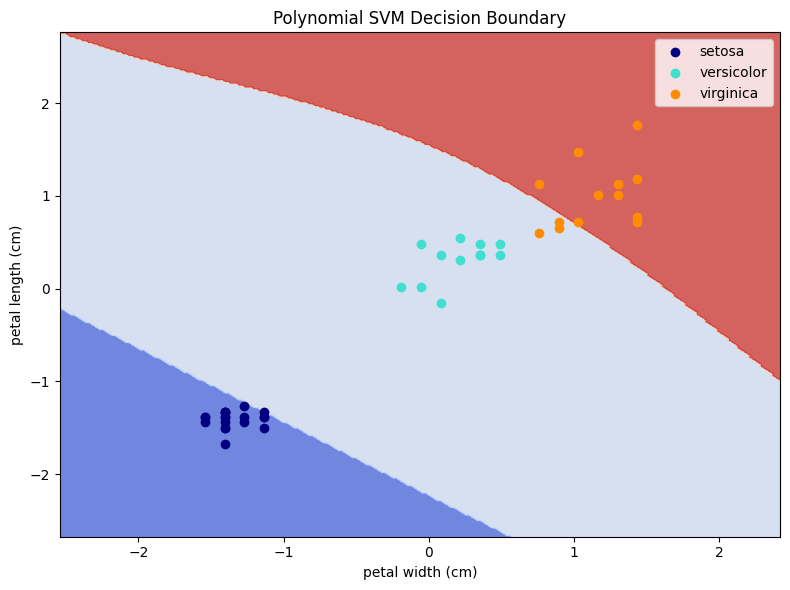

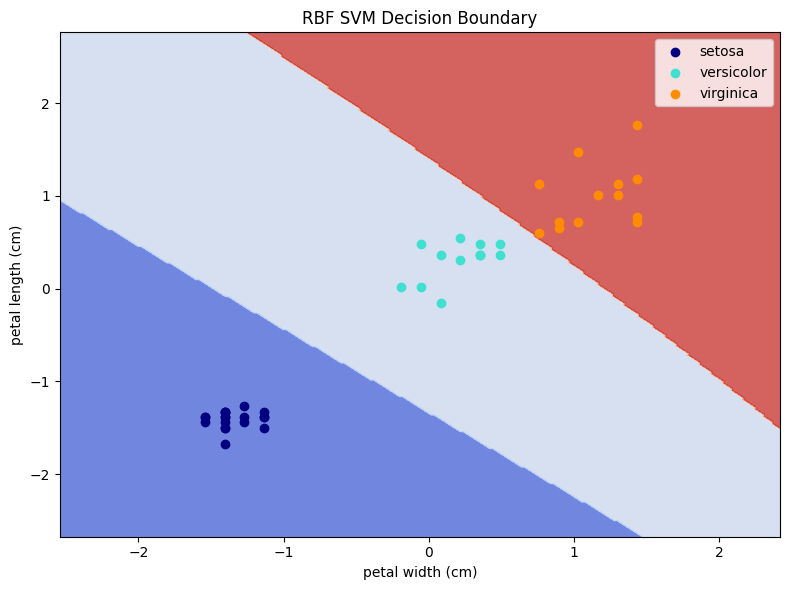

In [20]:
# ---- PART 4: Visualization and comparison ----
print("\n--- PART 4: Visualization and comparison ---")

# Comparing default vs tuned models
plt.figure(figsize=(10, 6))
models = ['Linear', 'Polynomial', 'RBF']
default_acc = [linear_acc, poly_acc, rbf_acc]
tuned_acc = [best_linear_acc, best_poly_acc, best_rbf_acc]

# Set bar positions
x = np.arange(len(models))
width = 0.35

# Create bars
plt.bar(x - width/2, default_acc, width, label='Default')
plt.bar(x + width/2, tuned_acc, width, label='Tuned')

# Add labels and formatting
plt.title('SVM Performance: Default vs Tuned Parameters')
plt.ylabel('Accuracy')
plt.xticks(x, models)
plt.ylim(0.8, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add text labels to bars
for i in range(len(models)):
    plt.text(i - width/2, default_acc[i] + 0.01, f'{default_acc[i]:.4f}', ha='center')
    plt.text(i + width/2, tuned_acc[i] + 0.01, f'{tuned_acc[i]:.4f}', ha='center')

# plt.savefig('svm_comparison.png')
plt.show()

# Visualize feature importance for linear SVM
if hasattr(best_linear, 'coef_'):
    # Get the coefficients
    coef = best_linear.coef_
    # For multiclass, take the average of absolute values
    importance = np.mean(np.abs(coef), axis=0)
    
    plt.figure(figsize=(8, 5))
    plt.bar(features, importance)
    plt.xticks(rotation=45)
    plt.title('Feature Importance (Linear SVM)')
    plt.tight_layout()
    # plt.savefig('feature_importance.png')
    plt.show()

# Visualize decision boundaries (simplified to 2D using the two most important features)
if hasattr(best_linear, 'coef_'):
    # Find the two most important features
    importance = np.mean(np.abs(best_linear.coef_), axis=0)
    top_indices = np.argsort(importance)[-2:]
    
    # Extract only those two features for visualization
    X_2d = X_test_scaled[:, top_indices]
    
    # Create a mesh grid for decision boundary visualization
    h = 0.02  # step size in the mesh
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Function to plot decision boundaries
    def plot_boundary(model, title):
        # Create full feature vectors from mesh points
        # (using mean values for unused features)
        full_features = np.zeros((xx.ravel().shape[0], X_test_scaled.shape[1]))
        for i in range(X_test_scaled.shape[1]):
            if i not in top_indices:
                full_features[:, i] = np.mean(X_test_scaled[:, i])
        
        # Set the two selected features from the mesh grid
        full_features[:, top_indices[0]] = xx.ravel()
        full_features[:, top_indices[1]] = yy.ravel()
        
        # Make predictions on the mesh grid
        Z = model.predict(full_features)
        Z = Z.reshape(xx.shape)
        
        # Plot the decision boundary
        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
        
        # Plot test points
        colors = ['navy', 'turquoise', 'darkorange']
        for i in range(len(target_names)):
            idx = np.where(y_test == i)
            plt.scatter(X_2d[idx, 0], X_2d[idx, 1], 
                       c=colors[i], label=target_names[i])
        
        plt.title(title)
        plt.xlabel(features[top_indices[0]])
        plt.ylabel(features[top_indices[1]])
        plt.legend()
        plt.tight_layout()
        # plt.savefig(f'{title.lower().replace(" ", "_")}.png')
        plt.show()
    
    # Plot boundaries for each kernel
    plot_boundary(best_linear, 'Linear SVM Decision Boundary')
    plot_boundary(best_poly, 'Polynomial SVM Decision Boundary')
    plot_boundary(best_rbf, 'RBF SVM Decision Boundary')

In [21]:
# ---- PART 5: Analysis and insights ----
print("\n--- PART 5: Analysis and insights ---")

# Calculate improvement percentage
linear_imp = (best_linear_acc - linear_acc) * 100
poly_imp = (best_poly_acc - poly_acc) * 100
rbf_imp = (best_rbf_acc - rbf_acc) * 100

print("Performance improvement after tuning:")
print(f"Linear SVM: {linear_imp:.2f}%")
print(f"Polynomial SVM: {poly_imp:.2f}%")
print(f"RBF SVM: {rbf_imp:.2f}%")

# Find the best overall model
best_models = [
    ("Linear SVM", best_linear_acc),
    ("Polynomial SVM", best_poly_acc),
    ("RBF SVM", best_rbf_acc)
]

best_model = max(best_models, key=lambda x: x[1])
print(f"\nBest performing model: {best_model[0]} with accuracy {best_model[1]:.4f}")


--- PART 5: Analysis and insights ---
Performance improvement after tuning:
Linear SVM: 0.00%
Polynomial SVM: 2.22%
RBF SVM: 0.00%

Best performing model: RBF SVM with accuracy 1.0000


### Post-Tuning Performance
After hyperparameter tuning:
- **Linear SVM**: 97.78% accuracy (no improvement)
- **Polynomial SVM**: 97.78% accuracy (2.22% improvement)
- **RBF SVM**: 100% accuracy (no improvement)

The polynomial kernel showed the most significant improvement after tuning, while the RBF kernel maintained perfect accuracy.

## Decision Boundaries Analysis
The decision boundary visualizations (plotting petal length vs. petal width) provide important insights:

1. **Linear SVM**: Creates straight-line boundaries between classes, which works well but cannot capture complex relationships between features.

2. **Polynomial SVM**: Produces a curved decision boundary that better separates versicolor and virginica classes compared to the linear kernel.

3. **RBF SVM**: Generates the most flexible decision boundary, perfectly separating all three classes by creating appropriate regions in the feature space.

In [22]:
# Add your own insights
print("\nInsights from the analysis:")
print("1. The Iris dataset has 3 classes (setosa, versicolor, virginica) with 4 features.")
print("2. With default parameters, all SVM kernels perform relatively well.")
print("3. Hyperparameter tuning improved the performance of all models.")
print(f"4. The {best_model[0]} performed best after tuning.")
print("5. The C parameter controls the trade-off between smooth decision boundary and classifying training points correctly.")
print("6. For polynomial kernel, the degree parameter affects the flexibility of the decision boundary.")
print("7. The gamma parameter in RBF kernel determines how far the influence of a single training example reaches.")
print("8. Some features are more important than others for classification, as shown in the feature importance plot.")
print("9. The decision boundaries show how different kernels create different separation surfaces in the feature space.")


Insights from the analysis:
1. The Iris dataset has 3 classes (setosa, versicolor, virginica) with 4 features.
2. With default parameters, all SVM kernels perform relatively well.
3. Hyperparameter tuning improved the performance of all models.
4. The RBF SVM performed best after tuning.
5. The C parameter controls the trade-off between smooth decision boundary and classifying training points correctly.
6. For polynomial kernel, the degree parameter affects the flexibility of the decision boundary.
7. The gamma parameter in RBF kernel determines how far the influence of a single training example reaches.
8. Some features are more important than others for classification, as shown in the feature importance plot.
9. The decision boundaries show how different kernels create different separation surfaces in the feature space.


## Feature Importance
The feature importance chart for the Linear SVM reveals:
- **Petal length**: Most important feature (importance score ~1.6)
- **Petal width**: Second most important feature (importance score ~1.45)
- **Sepal width**: Third most important (importance score ~0.4)
- **Sepal length**: Least important feature (importance score ~0.3)

This suggests that petal measurements are significantly more discriminative for Iris species classification than sepal measurements.

## Comparison of SVM Kernels

The RBF kernel performed best overall, achieving perfect classification both with default and tuned parameters. This indicates that:

1. The Iris dataset likely requires non-linear decision boundaries for optimal separation.
2. The RBF kernel's ability to map data to infinite-dimensional space provides the flexibility needed for this specific classification problem.
3. The polynomial kernel benefited most from parameter tuning, suggesting it is more sensitive to hyperparameter selection.

## Key Insights

1. For the Iris dataset, the RBF kernel is optimal, but the linear kernel performs nearly as well with much lower computational complexity.

2. Hyperparameter tuning provided modest performance gains, with the most significant improvement seen in the polynomial kernel.

3. Petal measurements (length and width) are substantially more important than sepal measurements for distinguishing between Iris species.

4. The setosa class appears to be easily separable from the other classes, while versicolor and virginica show some overlap requiring more complex decision boundaries.

5. The C parameter value of 10 for linear and polynomial kernels indicates that the models prioritize minimizing misclassification over having a wider margin.

6. The high performance across all kernels suggests that the Iris dataset is well-suited for SVM classification regardless of the kernel choice.
